In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB , BernoulliNB , MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score

In [25]:
car = pd.read_csv('car_evaluation.csv')
car

,Bying Price,Maintanance Cost,No of Doors,No of Persons,Luggage Boot Size,Safety Rating,Car Acceptability(Class)
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [26]:
print(car.isnull().sum())

Bying Price                 0
Maintanance Cost            0
No of Doors                 0
No of Persons               0
Luggage Boot Size           0
Safety Rating               0
Car Acceptability(Class)    0
dtype: int64


In [27]:
print(car.dtypes)

Bying Price                 object
Maintanance Cost            object
No of Doors                 object
No of Persons               object
Luggage Boot Size           object
Safety Rating               object
Car Acceptability(Class)    object
dtype: object


## Insights 

 Here you can see that 'No of doors' and 'No of persons' are in object , so we have to convert it into 'INT'

In [28]:
# Changing the columns (no of doors and no of Persons) into 'int'

car['No of Doors'] = car['No of Doors'].replace({'5more': 5}).astype(int)
car['No of Persons'] = car['No of Persons'].replace({'more': 5}).astype(int)

In [29]:
car.head(5)

,Bying Price,Maintanance Cost,No of Doors,No of Persons,Luggage Boot Size,Safety Rating,Car Acceptability(Class)
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
print(car.dtypes)

Bying Price                 object
Maintanance Cost            object
No of Doors                  int64
No of Persons                int64
Luggage Boot Size           object
Safety Rating               object
Car Acceptability(Class)    object
dtype: object


In [31]:
print(car.columns.tolist())

['Bying Price ', 'Maintanance Cost', 'No of Doors', 'No of Persons', 'Luggage Boot Size', 'Safety Rating ', 'Car Acceptability(Class)']


In [32]:
print(car['Bying Price '].unique())
print(car['Maintanance Cost'].unique())
print(car['Luggage Boot Size'].unique())
print(car['Safety Rating '].unique())
print(car['Car Acceptability(Class)'].unique())


['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [33]:
car.columns = car.columns.str.strip()

In [34]:
# Label encoding Manually 

car['Bying Price'] = car['Bying Price'].map({'vhigh':3, 'high':2, 'med':1, 'low':0})
car['Maintanance Cost'] = car['Maintanance Cost'].map({'vhigh':3, 'high':2, 'med':1, 'low':0})
car['Luggage Boot Size'] = car['Luggage Boot Size'].map({'small':0, 'med':1, 'big':2})
car['Safety Rating'] = car['Safety Rating'].map({'low':0, 'med':1, 'high':2})
car['Car Acceptability(Class)'] = car['Car Acceptability(Class)'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})


In [35]:
car.head()

,Bying Price,Maintanance Cost,No of Doors,No of Persons,Luggage Boot Size,Safety Rating,Car Acceptability(Class)
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [36]:
# After Label Encoding

print(car['Bying Price'].unique())
print(car['Maintanance Cost'].unique())
print(car['Luggage Boot Size'].unique())
print(car['Safety Rating'].unique())
print(car['Car Acceptability(Class)'].unique())

[3 2 1 0]
[3 2 1 0]
[0 1 2]
[0 1 2]
[0 1 3 2]


In [37]:
# Changing the target value as 0 and 1

car['Car Acceptability(Class)']=car['Car Acceptability(Class)'].apply(lambda x: 1 if x>=1 else 0)

In [38]:
# Splitting x and y 

x = car.drop("Car Acceptability(Class)", axis=1)
y = car["Car Acceptability(Class)"]

In [39]:
x.head()

,Bying Price,Maintanance Cost,No of Doors,No of Persons,Luggage Boot Size,Safety Rating
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Car Acceptability(Class), dtype: int64

In [41]:
#splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [42]:
# Checking wheather the data is balanced or not 

y_train.value_counts()

Car Acceptability(Class)
0    962
1    420
Name: count, dtype: int64

### Smote 

In [43]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Before SMOTE value counts
print("Before SMOTE:")
print(y_train.value_counts())

# SMOTE
sm = SMOTE(random_state=42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# After SMOTE value counts
print("\nAfter SMOTE:")
print(y_train_smote.value_counts())


Before SMOTE:
Car Acceptability(Class)
0    968
1    414
Name: count, dtype: int64

After SMOTE:
Car Acceptability(Class)
1    968
0    968
Name: count, dtype: int64


In [86]:
# Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)


## Logestic Regression

In [87]:
## Logistic Regression

from sklearn.linear_model import LogisticRegression
log_r=LogisticRegression()
log_r.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [46]:
## evaluating the model

from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

#### Train & Test Accuracy

In [88]:
# Train Accuracy

y_pred1 = log_r.predict(x_train_smote)

train_acc=accuracy_score(y_train_smote,y_pred1)
train_acc

0.8868801652892562

In [89]:
## Test Accuracy

y_pred=log_r.predict(x_test)

acc=accuracy_score(y_test,y_pred)
acc

0.8728323699421965

In [90]:
df=pd.DataFrame(np.c_[y_test,y_pred],columns=['actual','predicted'])
df

,actual,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
341,0,0
342,0,0
343,0,0
344,0,0


#### Classification Report 

In [91]:
import warnings
warnings.filterwarnings('ignore')


report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       242
           1       0.74      0.88      0.81       104

    accuracy                           0.87       346
   macro avg       0.84      0.88      0.86       346
weighted avg       0.88      0.87      0.88       346



#### Confusion Matrix

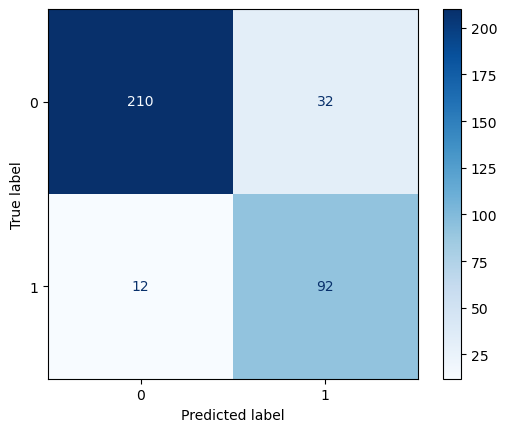

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.show()


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Logistic Regression
log_model = LogisticRegression(max_iter=500)

param_grid = {'C': [0.01,0.1, 10, 50]}

grid = GridSearchCV(log_model, param_grid, cv=5)
grid.fit(x_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 0.1}
Best Score: 0.8879178987186659


### insights

- The best value for Logistic Regression was C = 0.1.
- This gave the best accuracy of about 88%.
- The tuned model works well for this dataset.

## K-Nearest Neighbors

In [53]:
# Fit the algorithm 

Kclass = KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(x_train_smote,y_train_smote)
pr = Kclass.predict(x_test)
report = classification_report(y_test,pr)
print("KNN Accuracy:", accuracy_score(y_test,pr))
print(report)

KNN Accuracy: 0.9710982658959537
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       242
           1       0.93      0.98      0.95       104

    accuracy                           0.97       346
   macro avg       0.96      0.97      0.97       346
weighted avg       0.97      0.97      0.97       346



In [54]:
# Elbow Method

def elbow_method(k):
    test_f1 = []
    for i in k:
        Kclass = KNeighborsClassifier(metric='euclidean', n_neighbors=i).fit(x_train_smote, y_train_smote)
        pred = Kclass.predict(x_test)
        f1 = f1_score(y_test, pred)    
        error = 1 - f1
        test_f1.append(error)
    return test_f1

In [55]:
k = range(2, 20, 2)
testing = elbow_method(k)
print(testing)

[0.1933701657458563, 0.08457711442786064, 0.05714285714285716, 0.04225352112676062, 0.05990783410138245, 0.06849315068493156, 0.07692307692307687, 0.07207207207207211, 0.08520179372197312]


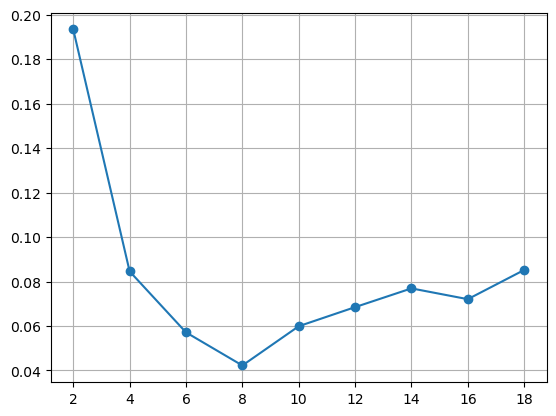

In [56]:

plt.plot(k, testing, marker='o')
plt.grid(True)
plt.show()


In [57]:
# After elbow method 
# Best n_neighbors = 8 

best_knn = KNeighborsClassifier(n_neighbors=8, metric='euclidean')
best_knn.fit(x_train_smote, y_train_smote)

pred_best = best_knn.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, pred_best))
print(classification_report(y_test, pred_best))


Accuracy: 0.9739884393063584
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       242
           1       0.94      0.98      0.96       104

    accuracy                           0.97       346
   macro avg       0.96      0.98      0.97       346
weighted avg       0.97      0.97      0.97       346



In [58]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# # list to store inertia values
# inertia_scores = []

# # testing k = 1 to 10
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(x_train_smote)  # or use your dataset X
#     inertia_scores.append(kmeans.inertia_)

# # Plot the elbow graph
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), inertia_scores, marker='o')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Inertia')
# plt.grid(True)
# plt.show()


## Naive Byes

In [59]:
gaus = GaussianNB()
gaus.fit(x_train_smote,y_train_smote)


GaussianNB()

In [60]:
# training accuracy 

train_pred = gaus.predict(x_train_smote)

print("Training Accuracy:", accuracy_score(y_train_smote, train_pred))

Training Accuracy: 0.9333677685950413


In [61]:
# Test Accuracy

y_pred0 = gaus.predict(x_test)

In [62]:
print("Accuracy:", accuracy_score(y_test, y_pred0))
print(classification_report(y_test, y_pred0))

Accuracy: 0.8757225433526011
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       242
           1       0.71      1.00      0.83       104

    accuracy                           0.88       346
   macro avg       0.85      0.91      0.87       346
weighted avg       0.91      0.88      0.88       346



[[199  43]
 [  0 104]]


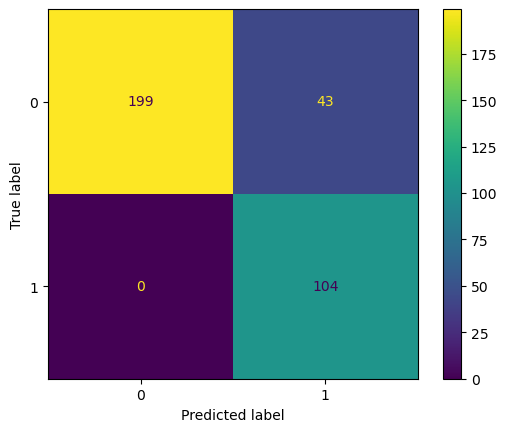

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred0)
print(cm)
ConfusionMatrixDisplay(cm).plot()


In [64]:
# HyperParameter tuning 

from sklearn.model_selection import GridSearchCV
import numpy as np

params = {
    "var_smoothing": np.logspace(-9, 0, 10)
}

grid = GridSearchCV(GaussianNB(), params, scoring="accuracy", cv=5)
grid.fit(x_train_smote, y_train_smote)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'var_smoothing': np.float64(0.01)}
Best Score: 0.9323343722528572


In [65]:
# best_model = grid.best_estimator_
# y_pred_best = best_model.predict(x_test)

# print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
# print(classification_report(y_test, y_pred_best))


## SVM (Support Vector Machine)

In [66]:
svc=SVC()
svc.fit(x_train_smote,y_train_smote)

SVC()

In [67]:
# Train Accuracy

y_prd = svc.predict(x_train_smote)


train_acc=accuracy_score(y_train_smote,y_pred1)
train_acc

0.8868801652892562

In [68]:
# Test Accuracy

y_pred_svc=svc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy: 0.9450867052023122
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       242
           1       0.85      0.99      0.92       104

    accuracy                           0.95       346
   macro avg       0.92      0.96      0.94       346
weighted avg       0.95      0.95      0.95       346



# insights

- The model got 88% accuracy on training data and 94.5% accuracy on test data,
- This means the model learns well and works even better on unseen data

In [69]:
# parameter grid

param_grid = {
    'C': [0.1, 1, 10, 30],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale','auto']
}

# Apply GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(x_train_smote, y_train_smote)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print(f'Best Hyperparameters : {best_params}')
print(f"Best Cross-validation Accuracy : {best_score:.2f}")
print(f"Best Estimator : {best_estimator}" )

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.1s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

### Insights 

- GridSearchCV helped find the best SVM settings.
- The best combination was C = 10, Kernel = RBF, Gamma = Auto.
- This setup gave 99% accuracy.
- The RBF kernel worked best because the data needs a flexible boundary.
- A higher C value helped the model make fewer mistakes.
- Overall, the tuned SVM model performs very well for this classification task.

## Decision Tree

In [70]:
# Model fitting 

dt = DecisionTreeClassifier(criterion = 'gini' , max_depth=5)
dt.fit(x_train_smote , y_train_smote)

DecisionTreeClassifier(max_depth=5)

In [71]:
# Train Accuracy

y_train_pred = dt.predict(x_train_smote)

print('Accuracy' , accuracy_score(y_train_smote , y_train_pred))

Accuracy 0.940599173553719


In [72]:
# Test Accuracy

y_test_pred = dt.predict(x_test)

print('Accuracy' , accuracy_score(y_test , y_test_pred))

Accuracy 0.9075144508670521


In [73]:
report = classification_report(y_test ,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       242
           1       0.81      0.91      0.86       104

    accuracy                           0.91       346
   macro avg       0.88      0.91      0.89       346
weighted avg       0.91      0.91      0.91       346



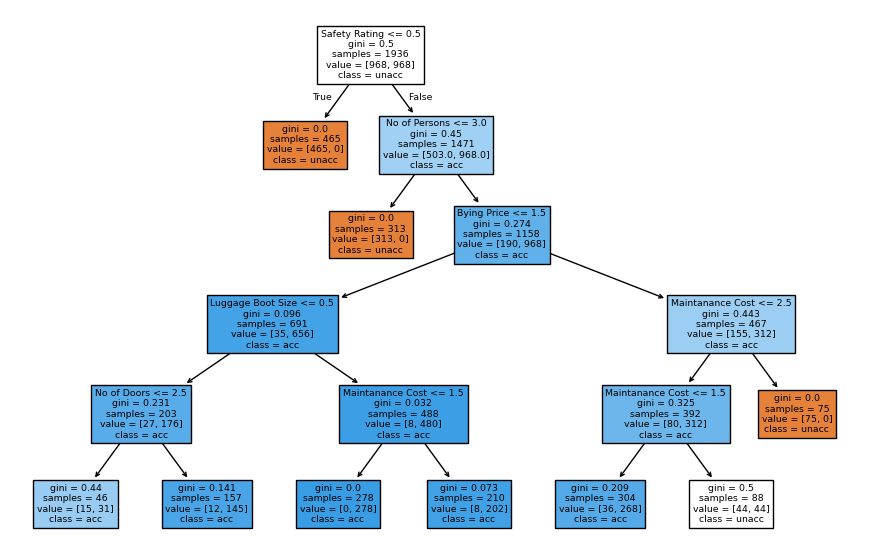

In [74]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(11,7))

tree.plot_tree(
    dt,
    filled=True,
    feature_names=list(car.columns[:-1]),     # all feature column names
    class_names=['unacc', 'acc', 'good', 'vgood']  # target class names
)

plt.show()


### Inights

- We plotted the decision tree to understand how the model makes decisions
- The tree shows conditions at each split, like safety rating, persons, buying price, etc.
- The model follows these rules to classify cars into categories.
- Leaf nodes show final decisions , such as acceptable or unacceptable.

In [75]:
# Initialize a decision tree classifier

dt_df = DecisionTreeClassifier(criterion='entropy' , max_depth=5 ,random_state=42)

In [76]:
# Hyperparameter grid for tuning 

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [3,5,10,None],
    'criterion' : ['gini' , 'entropy']
}

# Grid Search with cross-validation

grid_search = GridSearchCV(estimator=dt_df , param_grid=param_grid , cv=5 , scoring='accuracy' , n_jobs=-1)
grid_search.fit(x_train , y_train)

# Best model
best_model = grid_search.best_estimator_
print(best_model)

DecisionTreeClassifier(criterion='entropy', random_state=42)


### Insights

- We applied GridSearchCV to find the best depth and criterion for the Decision Tree.
- The tuning selected the best model with entropy criterion.
- This improves accuracy and prevents the tree from being too deep or overfitting.

## Random Forest

In [77]:
# Create Random Forest model

rf_clf = RandomForestClassifier(n_estimators=100,       # number of trees
                                max_depth=None,        # tree depth
                                random_state=42)

rf_clf.fit(x_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [78]:
# Train Accuracy

y_train_pred = rf_clf.predict(x_train_smote)

print('Accuracy' , accuracy_score(y_train_smote , y_train_pred))

Accuracy 1.0


In [79]:
# Test Accuracy

y_test_pred = rf_clf.predict(x_test)

print('Accuracy' , accuracy_score(y_test , y_test_pred))

Accuracy 0.9942196531791907


In [80]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.9942196531791907

Confusion Matrix:
 [[240   2]
 [  0 104]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       242
           1       0.98      1.00      0.99       104

    accuracy                           0.99       346
   macro avg       0.99      1.00      0.99       346
weighted avg       0.99      0.99      0.99       346



In [81]:
# Hyperparameter tuning

param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' : [None,10,20,30],
    'min_samples_leaf' : [2,5,10] , 
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(oob_score=True , random_state=42),
                          param_grid=param_grid,
                          cv=3,verbose=2)

# Fit the grid search to the data 
grid_search.fit(x_train_smote,y_train_smote)

# Best Parameter Model
print('Best Parameters :' ,grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evolute the best Model on the test set

y_pred_best = best_rf.predict(x_test)
print('Best Model Accuracy :' , accuracy_score(y_test , y_pred_best))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf

In [82]:
print('OOB Score of the Random Forest :' , best_rf.oob_score_)

OOB Score of the Random Forest : 0.9917355371900827


In [83]:
print(classification_report(y_test , y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       0.99      1.00      1.00       104

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



### Insight

- AdaBoost, Gradient Boosting, and XGBoost are boosting algorithms that improve weak models by combining them.
- They help increase accuracy by learning from previous mistakes.
- In our case, Random Forest already performed extremely well, so using boosting models was optional.

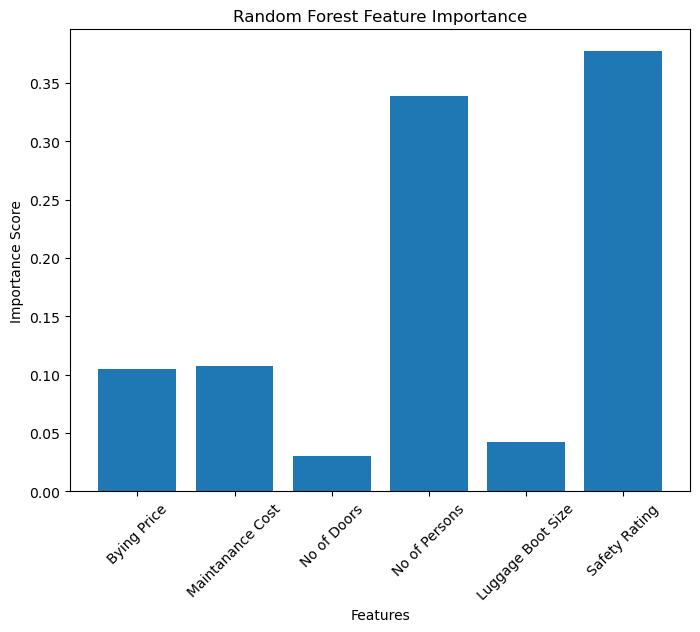

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

importances = rf_clf.feature_importances_
features = car.columns[:-1]

plt.figure(figsize=(8,6))
plt.bar(features, importances)
plt.xticks(rotation=45)
plt.title("Random Forest Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


### Insights

- This plot shows how much each feature contributed to the Random Forest model.
- We can see that Safety Rating and Number of Persons have the highest importance, meaning the model relies on them the most to classify car acceptability.
- Features like Buying Price and Maintenance Cost also contribute, but less.
- Number of Doors and Luggage Boot Size have the lowest impact, meaning they influence predictions the least.

## Final Conclusion

- In this project, multiple machine learning models were applied to classify car acceptability.
- After comparing model performances, Random Forest emerged as the most accurate model, achieving nearly perfect results.
- The feature importance analysis showed that Safety Rating and Number of Persons play a major role in decision-making.
- Overall, the project shows that machine learning can successfully analyze car evaluation data and provide reliable predictions.